<a href="https://colab.research.google.com/github/yanisamrouche/data_science/blob/main/tp4_ISD_bonheur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à la Science de Données
# TP4 - Clustering et visualisation

Ce TP s'intéresse au clustering. Les données viennent d'une compétition kaggle sur le [niveau de bonheur dans le monde](https://www.kaggle.com/unsdsn/world-happiness) (si, si, ...)

## Indice de Bonheur
Dans un premier temps, il faut récupérer les données stockées dans le fichier "bonheur.csv". Comme d'habitude, on commence par regarder les données et leur description statistique :

In [143]:
import pandas as pd
donnees = pd.read_csv("bonheur.csv")
donnees.describe()


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Le but initial de cette compétition était de prédire le *score de bonheur* (colonne *Happiness.Score*) en fonction des autres (sauf celle du *classement de bonheur*, *Happiness.Rank*).

Nous allons prendre une approche différente et travailler à regrouper les données en clusters et voir quelle information en tirer.

La première chose à faire est de créer une variable $Clean$ qui ne contient que les colonnes utiles.

**Question.** Supprimer les colonnes *Happiness.Rank*, *Whisker.high*, et *Whisker.low* et stocker le résultat dans une dataframe s'appellant *Clean*.

In [ ]:
# A vous
columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low']
Clean = donnees.drop(columns, axis=1)
Clean.describe()


,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


On commence par regarder les corrélations entre les 8 attributs restants et le score de bonheur :

([<matplotlib.axis.YTick at 0x7f7bc4291990>,
 [Text(0, 0, 'Happiness.Score'),
  Text(0, 0, 'Economy..GDP.per.Capita.'),
  Text(0, 0, 'Family'),
  Text(0, 0, 'Health..Life.Expectancy.'),
  Text(0, 0, 'Freedom'),
  Text(0, 0, 'Generosity'),
  Text(0, 0, 'Trust..Government.Corruption.'),
  Text(0, 0, 'Dystopia.Residual')])

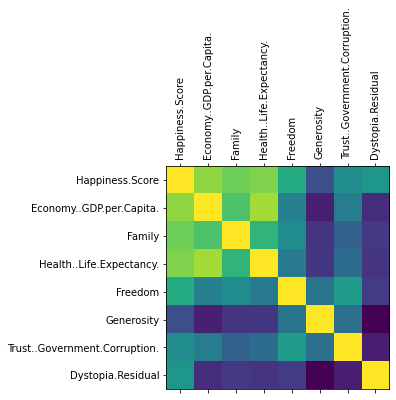

In [ ]:
cor = Clean.corr() # calcul de la matrice de correlation 


import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(cor)
plt.xticks(range(len(cor.columns)), cor.columns, rotation=90)
plt.yticks(range(len(cor.columns)), cor.columns)

**Question** Quelles sont les colonnes les plus corrélées ? Quelle(s) colonne(s)semble(nt) le(s) plus corrélée(s) au score de bonheur ? Quelle(s) est/sont celle(s) qui le sont le moins ?

## Associer des étiquettes à des intervalles de bonheur

Si nous séparions le happiness score en quatre percentiles, nous pourrions attribuer une étiquette àchaque pays correspondant à ce happiness score ('très malheureux', 'malheureux', 'heureux' et 'très heureux' donc sur une échelle de 1 à 4 (ou de 0 à 3...).

Calculer les 4 percentiles sur la base de toutes les données, créer un dictionnaire qui, à chaque percentile, associe son intitulé : appelons cela des classes de bonheur. Créer et calculer, enfin, un vecteur ``B1'' de taille le nombre de données (pays = lignes), qui indique pour chaque pays le numéro de sa classe en fonction de son appartenance au percentile associé, en fonction donc de son score de happiness.

In [ ]:
# a vous
import numpy as np
percentile1 = np.percentile(Clean['Happiness.Score'], 25)
percentile2 = np.percentile(Clean['Happiness.Score'], 50)
percentile3 = np.percentile(Clean['Happiness.Score'], 75)
percentile4 = np.percentile(Clean['Happiness.Score'], 100)
dico = {'très malheureux': percentile1,'malheureux': percentile2, 'heureux': percentile3,'très heureux': percentile4}
quart = 0
demi = 0
trois_demi = 0
one = 0
array = []
for ligne in Clean['Happiness.Score']:
    if(ligne<=percentile1):
        quart  = quart+1
        array.append(0)
    if(ligne>=percentile1 and ligne<=percentile2):
        demi = demi+1
        array.append(1)
    if(ligne>percentile2 and ligne<=percentile3):
        trois_demi = trois_demi+1
        array.append(2)
    if(ligne>percentile3):
        one = one+1
        array.append(3)
print(array)
print(len(array))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
155


Représenter, sous forme graphique de votre choix (réflechissez avant de coder !), l'attribution des classes aux pays.

In [ ]:
# a vous

## Clustering (partie à rendre, jusqu'à stabilité)

Nous cherchons maintenant à voir si, étant données les colonnes (variables) disponibles, mais sans le score de bonheur (happiness score) dans l'apprentissage, nous pouvons approcher la classification faite et visualisée ci-avant sur la base du happiness score. Autrement dit, nous cherchons à vérifier dans quelle mesure ce score de bonheur est issu des autres variables observées. Pour cela, nous allons utiliser l'algorithme de classification non-supervisée, $k$-moyennes, qui ne considérera pas du tout le score de bonheur (puisque d'une certaine manière c'est ce que nous cherchons à retrouver).

En scikit-learn, l'algorithme des kmeans est géré par la classe *sklearn.cluster.KMeans* dont la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) peu s'avérer très utile.

**Question.**
1. Stocker dans une variable *X* les 7 attributs descriptifs (on enlève Happiness Score que nous allons essayer de retrouver à l'intérieur des clusters)
2. Réaliser un clustering à l'aide de l'algorithme des k-means sur l'ensemble de ces données, avec un *k* raisonable.
3. Représenter visuellement l'attribution de chaque classe à chaque pays.
4. Au regard de l'objectif présenté, analyser et comparer **visuellement** le résultat précédent qui était basé uniquement sur les percentiles liés à l'indice de bonheur (*Happiness.Score*) qui n'a pas servi au clustering. 

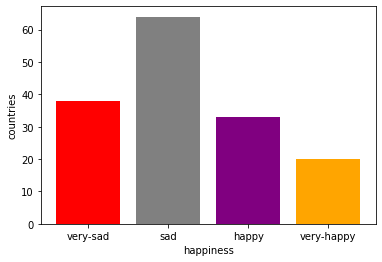

In [ ]:
# A vous
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#Stocker dans X les 7 attributs descriptifs
X = Clean.drop(['Country','Happiness.Score'], axis=1);
X = X.to_numpy()
#réalisation d'un clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
class_0, class_1, class_2, class_3 = 0,0,0,0
for i in kmeans.labels_:
  if (i==0):
    class_0 +=1
  if (i==1):
    class_1 +=1
  if (i==2):
    class_2 +=1
  if (i==3):
    class_3 +=1
 # x-coordinates of left sides of bars
left = [0,1,2,3]
 
# heights of bars
height = [class_0,class_1,class_2,class_3]
 
# labels for bars
tick_label = ['very-sad', 'sad', 'happy', 'very-happy']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'grey','purple','orange'])
 
# naming the x-axis
plt.xlabel('happiness')
# naming the y-axis
plt.ylabel('countries')

 
# function to show the plot
plt.show()

### Evaluation de la qualité

Pour évaluer **quantitativement** la qualité d'un clustering, l'analyse **visuelle** précédente ne suffit plus : nous devons quantifier la qualité du clustering en se basant sur des mesures adéqautes. 

Q1.  Nous savons (depuis le cours) que nous devons regarder les distances intra-classes et inter-classes. Mais avant de faire cela, nous ne pouvons  pas nous empêcher de regarder en détail ce que donne notre clustering à l'aide de la partie supervisée des données (avouez que ce serait dommage, non ? C'est déjà ce que nous avions abordé avec nos percentiles sur l'indice du bonheur, maintenant nous allons nous basé sur le rang de bonheur !).

L'idée est donc la suivante : puisque l'on connaît le classement de chaque pays (colonne *Happiness.rank* initialement présente dans les données), on peut regarder pays par pays et regarder combien sont dans la bonne classe (ou dans la mauvaise). On va considérer qu'un pays est dans la bonne classe si le précédent dans le classement et le suivant sont **tous les deux** dans la même classe que lui ; il est dans la mauvaise classe sinon.

In [ ]:
# A vous
array = kmeans.labels_
err = []
for i in range(1,len(array)-2):
  if(array[i] != array[i-1] or array[i] != array[i+1]):
    err.append(array[i])
print(err)
print("le nombre de pays dans la mauvaise classe : ", len(err))
print("le nombre de pays dans la bonne classe : ", len(array) - len(err))

[1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 0, 2, 3, 2, 3, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 3, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2]
le nombre de pays dans la mauvaise classe :  106
le nombre de pays dans la bonne classe :  49


Q2. Cette façon de faire n'est toutefois pas satisfaisante : d'abord elle repose sur l'utilisation d'une information "supervisée" ce qui n'est pas possible normalement~; ensuite parce que nous ne savons pas comment le score est calculé : les différents critères sont sans doute pondérés pour l'obtenir. 

L'idée ici est de regarder dans un premier temps la distance moyenne des éléments dans chacun des clusters (calcul de l'homogénéité de chaque cluster -- appelée aussi intra-classes). En déduire l'homogénéité moyenne du clustering obtenu. 

In [ ]:
import numpy as np
def get_cluster_index(num_cluster, labels):
  return np.where(labels==num_cluster)[0]
 

In [ ]:
def get_Bary_Center(num_cluster, labels):
  indexs = get_cluster_index(num_cluster, labels)
  m = np.array(X[indexs[0]])
  for i in range(1,len(indexs)-1):
    m = m+np.array(X[indexs[i]])
  return np.array(m)/len(indexs)

In [ ]:
print(kmeans.cluster_centers_[0])
print("----------------------------")
print(get_Bary_Center(0,kmeans.labels_))

[0.45201849 0.91108697 0.26249626 0.3174509  0.23983232 0.09091954
 1.81087018]
----------------------------
[0.45201849 0.91108697 0.26200224 0.31032348 0.23244083 0.08943098
 1.75650163]


In [ ]:
def homogenite(k_means ,num_cluster, labels):
 # bary_center = get_Bary_Center(num_cluster, labels)
  bary_center = k_means.cluster_centers_[num_cluster]
  indexs = get_cluster_index(num_cluster, labels)
  h = np.sqrt(np.sum(np.square(np.array(X[indexs[0]])-bary_center)))
  for i in range(1,len(indexs)-1):
    h = h + np.sqrt(np.sum(np.square(np.array(X[indexs[i]])-bary_center)))
  return np.array(h)/len(indexs)
homogenite(kmeans, 0, kmeans.labels_)

0.4290046518309173

In [ ]:
scores = []
for i in range(4):
 s = homogenite(kmeans, i, kmeans.labels_)
 scores.append(s)
print(np.array(scores).mean())

0.4561462178994642


In [ ]:
def mean_dispersion(k_means, n_cl):
  mean = []
  for i in range(n_cl):
    mean.append(homogenite(k_means,i, k_means.labels_))
  return np.array(mean).mean()
mean_dispersion(kmeans, 4)

0.4561462178994642

Q3. Il faut maintenant calculer la distance entre cluster (séparabilité). Pour cela, une façon de faire est de calculer le barycentre de chacun des cluster, puis de calculer la distance entre chacun de ces centre de gravité deux par deux. Il est possible que vous trouviez dans la documentation une façon de récupérer les coordonnées des barycentre directement à partir du classifieur (on dit ça, on dit rien). Calculer ainsi la séparabilité entre chaque couple de cluster, et terminer par le score global de séparabilité du clustering.

In [ ]:
def ecart(k_means, num_cluster1, num_cluster2):
  #dist = np.sqrt(np.sum(np.square(np.array(get_Bary_Center(num_cluster1, kmeans.labels_)) - np.array(get_Bary_Center(num_cluster2, kmeans.labels_)))))
  dist = np.sqrt(np.sum(np.square(np.array(k_means.cluster_centers_[num_cluster1]) - np.array(k_means.cluster_centers_[num_cluster2]))))
  return dist

In [ ]:
def mean_ecart(k_means, k):
  ec = 0
  for i in range(k):
    for j in range(i+1,k):
      ec = ec + ecart(k_means,i,j)
  return 2*ec/(k*(k-1))
print(mean_ecart(kmeans, 4))

1.038845444947256


Q4. Calculer maintenant le score de silhouette de chaque donnée de l'échantillon. Quelle est la proportion de silhouettes négatives ? Qu'est-ce que cela signifie ?

In [ ]:
def a(x, num_cluster, labels):
  indexs = get_cluster_index(num_cluster, labels)
  d = 0
  for i in range(1,len(indesx)-1):
    d = d + ecart(x,i)
  return (1/(len(indexs)-1))*d

In [ ]:
def b(x, num_cluster, labels, nbr_cl):
  distances = []
  for i in range(nbr_cl):
    if(i != num_cluster):
      d = 0
      indexs = get_cluster_index(i, labels)
      for j in range(1,len(indesx)-1):
        d = d + ecart(x,j)
      d = d/(len(indexs))
      distances.append(d)
  return np.min(distances)

In [ ]:
def s(x, num_cluster, nbr_cl,labels):
  b = b(x,num_cluster,labels, nbr_cl)
  a = a(x,num_cluster,labels)
  if(b>a):
    return (b-a)/b
  else:
    return (b-a)/a

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

0.29400994040930944

In [ ]:
from sklearn import metrics
proportion_négatives = 0;
array_samples = metrics.silhouette_samples(X,kmeans.labels_, metric='euclidean')
for i in array_samples:
  if(i < 0):
    proportion_négatives+=1
print("la proportion de silhouettes négatives est : ", proportion_négatives)
print("la proportion de silhouettes positives est : ", len(kmeans.labels_) - proportion_négatives)

la proportion de silhouettes négatives est :  10
la proportion de silhouettes positives est :  145
ration pos/nég :  15.5


Q5. Refaire les Q2, Q3 et Q4 pour d'autres valeurs de 𝑘 (par exemple 𝑘=2,5,10) : Quel 𝑘
vous semble meilleur ?


In [ ]:
# A vous
X_ = Clean.drop(['Country','Happiness.Score'], axis=1);
X_ = X_.to_numpy()
K = [2, 5, 10]
results = []
for k in K:
  print("pour k=",k)
  kmeans_ = KMeans(n_clusters=k, random_state=0).fit(X_)
  print("l'homogénéité moyenne du clustering obtenu, séparabilité du clustering, le score de silhouette")
  Q2 = mean_dispersion(kmeans_,k)
  results.append(Q2)
  Q3 = mean_ecart(kmeans_,k)
  results.append(Q3)
  Q4 = metrics.silhouette_score(X_, kmeans_.labels_, metric='euclidean')
  results.append(Q4)
  print(results)
  results.clear()
  print("-----------------------------------------------------------------------------------------------------")





pour k= 2
l'homogénéité moyenne du clustering obtenu, séparabilité du clustering, le score de silhouette
[0.5741781951862396, 0.9104689706126621, 0.311966726579304]
-----------------------------------------------------------------------------------------------------
pour k= 5
l'homogénéité moyenne du clustering obtenu, séparabilité du clustering, le score de silhouette
[0.42682212127405855, 1.1040808645140816, 0.27230847001252706]
-----------------------------------------------------------------------------------------------------
pour k= 10
l'homogénéité moyenne du clustering obtenu, séparabilité du clustering, le score de silhouette
[0.3289975059476, 1.079681972112643, 0.2208874284572433]
-----------------------------------------------------------------------------------------------------


Q6. Finalement, nous pouvons regarder chacun des pays que nous avions noté comme "mal classé" en Q1, et regarder leur distance avec chacun des barycentres. Est-ce que ces pays se trouve à une distance presque égale à 2 (ou plus) barycentre ? Qu'est-ce que cela nous apprend sur la façon de calculer le score de bonheur ?

In [ ]:
# A vous


### Etude de la stabilité

Nous pouvons étudier la stabilité d'un algorithme de clustering pour un échantillon donné en observant la variation des mesures de qualité ci-avant, en fonction de la variation de l'échantillon et/ou de l'initialisation. Ici, nous proposons d'étudier cette stabilité en procédant comme suit:

Répéter 20 fois (avec le meilleur $k$ trouvé précédemment):
1. Prendre 80% de l'échantillon initial
2. Lancer l'algorithmede clustering 
3. Calculer homogénéité $H$, séparabilité $S$, l'indice de Davis-Bouldin ($D_b$) et la proportion de silhouettes négatives ($F$)

Puis, pour chaque mesure de qualité, un diagramme de Tukey indiquant médiane et quartiles. Conclure sur la stabilité des $k$-moyennes sur le clustering de cet échantillon.

In [149]:
# A vous
H = []
S = []
D = []
F = []


[['Norway' 1 7.537000179290769 ... 0.36201223731041 0.31596383452415505
  2.27702665328979]
 ['Denmark' 2 7.52199983596802 ... 0.3552804887294771 0.40077006816863997
  2.31370735168457]
 ['Iceland' 3 7.50400018692017 ... 0.47554022073745705
  0.15352655947208402 2.32271528244019]
 ...
 ['Tanzania' 153 3.34899997711182 ... 0.354256361722946
  0.0660351067781448 0.621130466461182]
 ['Burundi' 154 2.90499997138977 ... 0.20443518459796897
  0.0841479450464249 1.68302416801453]
 ['Central African Republic' 155 2.69300007820129 ... 0.280876487493515
  0.0565650761127472 2.06600475311279]]
[[1.00000000e+00 7.53700018e+00 7.59444482e+00 ... 3.62012237e-01
  3.15963835e-01 2.27702665e+00]
 [2.00000000e+00 7.52199984e+00 7.58172806e+00 ... 3.55280489e-01
  4.00770068e-01 2.31370735e+00]
 [3.00000000e+00 7.50400019e+00 7.62203047e+00 ... 4.75540221e-01
  1.53526559e-01 2.32271528e+00]
 ...
 [1.53000000e+02 3.34899998e+00 3.46142976e+00 ... 3.54256362e-01
  6.60351068e-02 6.21130466e-01]
 [1.54000

__Pour les plus curieu-ses-x__

Faire une recherche sur l'indice de Rand permettant de mesure la stabilité d'un algorithme de clustering, et appliquer cette technique à l'étude du clustering précédent. Indiquer la source de documentation retenue. Conclure au regard de la technique précédente.

In [ ]:
# A vous

## Conclusion

L'indice de bonheur est-il plutôt fondé sur les autres variables descriptives, ou sur le rang de bonheur ? Dans le premier cas, que signifie ce "rang" dans les données ? Dans le second cas, comment score et rang de bonheur sont-ils corrélés ?

In [ ]:
# A vous : code et texte libre bienvenus